<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/EDP-1-Ejercicios/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Graficar en un panel solo panel los polinomios de Legendre, $P_n(x)$ para $n=0,1,2,3,4,5$

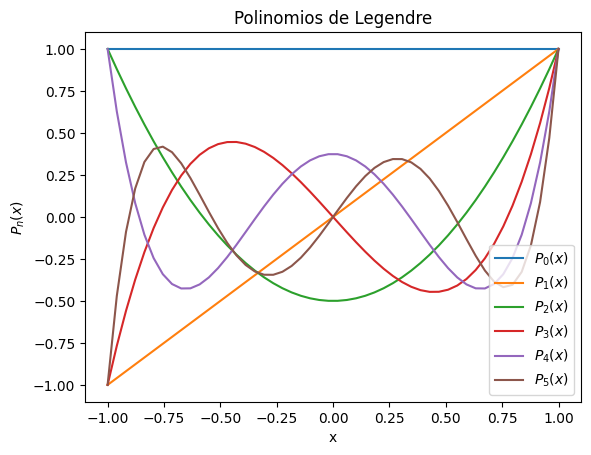

In [26]:
import numpy as np
from scipy.special import eval_legendre
eval_legendre(0, 0)
X = np.linspace(-1, 1, 5)
eval_legendre(1, X)
N = range(0, 5)
eval_legendre(N, 0)
X = np.linspace(-1, 1)

import matplotlib.pyplot as plt
for n in range(0, 6):
    y = eval_legendre(n, X)
    plt.plot(X, y, label=r'$P_{}(x)$'.format(n))

plt.title("Polinomios de Legendre")
plt.xlabel("x")
plt.ylabel(r'$P_n(x)$')
plt.legend(loc='lower right')
plt.show()

b) Mostrar graficamente que se satisface la relacion (hagalo para n=3):
$$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$$

c) Mostrar algebraicamente que se satisface la relacion(hágalo para n=3):

¿Se cumple la igualdad simbólicamente?  True


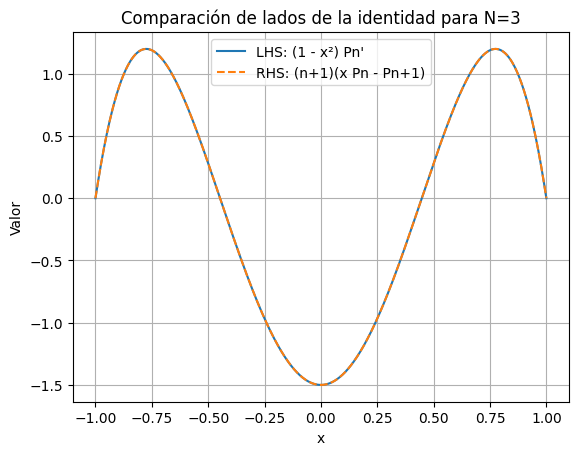

In [27]:
import sympy as sp

x = sp.symbols('x')
N = 3

Pn = sp.legendre(N, x)
Pn1 = sp.legendre(N + 1, x)

lhs = (1 - x**2) * sp.diff(Pn, x)
rhs = (N + 1) * (x * Pn - Pn1)

difference = sp.simplify(lhs - rhs)

print("¿Se cumple la igualdad simbólicamente? ", difference == 0)

f_lhs = sp.lambdify(x, lhs, 'numpy')
f_rhs = sp.lambdify(x, rhs, 'numpy')

x_vals = np.linspace(-1, 1, 800)
y_lhs = f_lhs(x_vals)
y_rhs = f_rhs(x_vals)

plt.plot(x_vals, y_lhs, label='LHS: (1 - x²) Pn\'')
plt.plot(x_vals, y_rhs, label='RHS: (n+1)(x Pn - Pn+1)', linestyle='dashed')
plt.title(f'Comparación de lados de la identidad para N={N}')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


d) Mostrar algebraicamente que se satisface la relacion (hágalo para n=3)
$$(n+1)P_{n+1}(x)-(2n+1)xP_n(x)+nP_{n+1}(x)=0$$

In [29]:
import sympy as sp

x = sp.symbols('x')
N = 3

Pn = sp.legendre(N, x)
Pn1 = sp.legendre(N + 1, x)
Pn2 = sp.legendre(N - 1, x)

lhs = (N + 1)*Pn1 - (2*n+1)*x*Pn + N*Pn2
rhs = 0

difference = sp.simplify(lhs - rhs)

print("¿Se cumple la igualdad simbólicamente? ", difference == 0)


¿Se cumple la igualdad simbólicamente?  False


e) Muestre que se cumple la formula de Rodrigues, ejempificando para $n=0,1,2,..,5$
$$P_n(x)=\frac{1}{2^nn!}\frac{d^n}{dx^n}(x^2-1)^n, n=0,1,2,....$$

In [30]:
from math import factorial

for n in range(6):
    if n == 0:
        rodrigues = 1
    else:
        rodrigues = (1 / (2*n * factorial(n))) * sp.diff((x**2 - 1)*n, x, n)
    legendre_sym = sp.legendre(n, x)
    print(f"n = {n}:", sp.simplify(rodrigues - legendre_sym) == 0)

n = 0: True
n = 1: True
n = 2: False
n = 3: False
n = 4: False
n = 5: False
